[-10.    -9.99  -9.98 ...   9.98   9.99  10.  ]


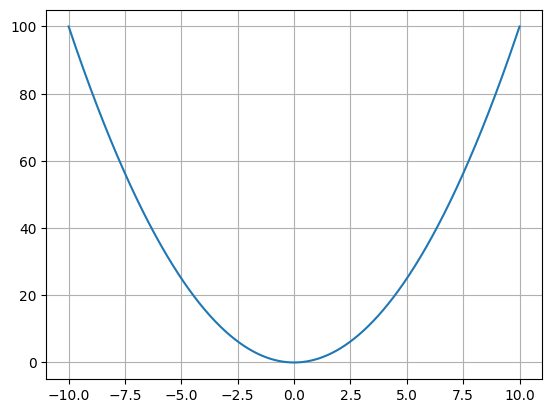

In [5]:
#  импортируем необходимые библиотеки для работы с массивами чисел и для визуализации
import numpy as np
import matplotlib.pyplot as plt

# х - аргумент в нашей функции. # передадим начало и конец числового отрезка нашей функции и шаг аргумента:
x = np.arange(-10, 10.01, 0.01) # массив значений аргумента
print(x)

# построение графика параболы
plt.plot(x, (x**2))

# включим сетку на графике
plt.grid(True)

# показать график

# закоментировал чтоб не логал
plt.show()

In [ ]:
27**(1/3)

# 3.5. Производная. Общие понятия

In [ ]:
#Задание 3.5.2
y_ = 1/(2*3)

x0 = 9
y0 = x0 ** (1/2)

x1 = 10
y1 = y0 + ((x1 - x0) * (1/ (2 * y0)))

x2 = 8
y2 = y0 + ((x2 - x0) * (1/ (2 * y0)))

print(round(y1, 2), round(y2, 2))

In [ ]:
#Задание 3.5.3
print(0.1)

In [ ]:
#Задание 3.5.4
x = 1
y = 1 / (4 * (x**(1/4)))
y

# 3.7. Функция многих переменных

In [ ]:
#Задание 3.7.2
import numpy as np
x = np.exp(-2 * (0.1+0.3+0.6) )
print(x, round(1 / (1 + x), 2))

In [ ]:
#Задание 3.7.3
x1 = 1
x2 = 3
x3 = 5

y1 = 2.1
y2 = 2.9
y3 = 4.1

w0 = 1
w1 = 1

L = ((y1 - w0 - (x1*w1))**2) + ((y2 - w0 - (x2*w1))**2) + ((y3 - w0 - (x3*w1))**2)
L

# 3.8. Частные производные

# 3.9. Градиент

In [ ]:
# Задание 3.9.4
import numpy as np

f = np.array([8, 2, 8, 3, 5, 6, 5, 15])

ff = np.gradient(f, 7)

ff

In [1]:
# Задание 3.9.4
import numpy as np

f = np.array([8, 2, 8, 3, 5, 6, 5, 15])

ff = np.gradient(f, 7)

ff

array([-0.85714286,  0.        ,  0.07142857, -0.21428571,  0.21428571,
        0.        ,  0.64285714,  1.42857143])

# 3.11. Оптимизация

Общий интерфейс для решения задач как условной, так и безусловной оптимизации в пакете scipy.optimize предоставляется функцией minimize(). Однако известно, что универсального способа для решения всех задач не существует, поэтому выбор подходящего метода как всегда ложится на плечи исследователя.

Подходящий алгоритм оптимизации задаётся с помощью аргумента функции minimize(..., method="").

Функция minimize из пакета scipy.optimize предоставляет общий интерфейс для решения задач условной и безусловной минимизации скалярных функций нескольких переменных. Чтобы продемонстрировать её работу, нам понадобится подходящая функция нескольких переменных, которую мы будем минимизировать.

Для этих целей прекрасно подойдет функция Розенброка от  переменных, которая имеет вид:

sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0, axis=0)

Несмотря на то, что функция Розенброка и её матрицы Якоби и Гессе (первой и второй производной соответственно) уже определены в пакете scipy.optimize, определим её самостоятельно.

In [6]:
import numpy as np

def rosen(x):
# Функция Розенброка
    return np.sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0, axis=0)

Для наглядности отрисуем в 3D значения функции Розенброка от двух переменных.

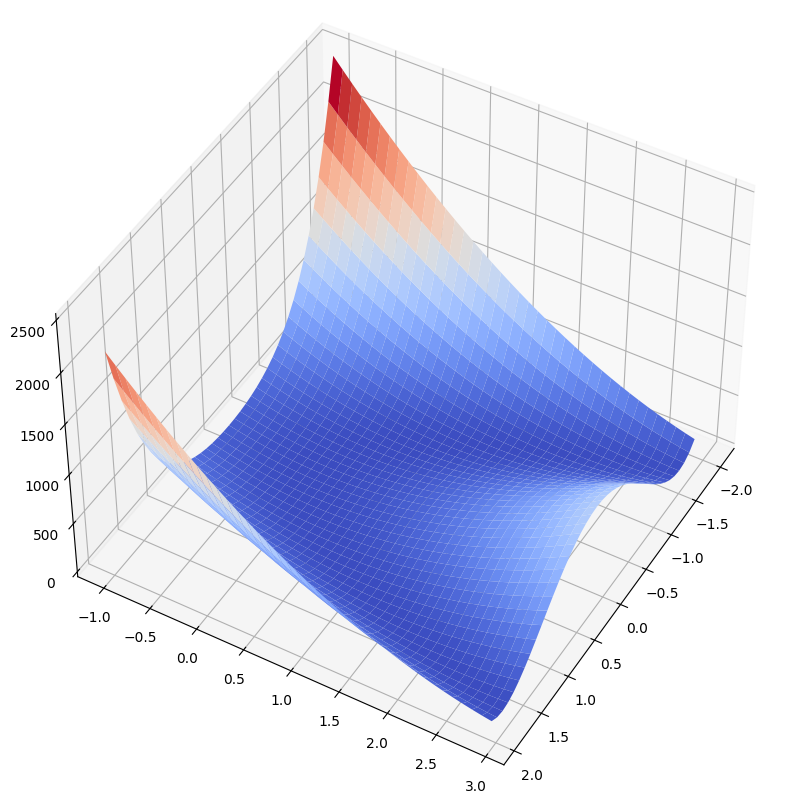

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Настраиваем 3D график
fig = plt.figure(figsize=[15, 10])
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')

# Задаем угол обзора
ax.view_init(45, 30)

# Создаем данные для графика
X = np.arange(-2, 2, 0.1)
Y = np.arange(-1, 3, 0.1)
X, Y = np.meshgrid(X, Y)
Z = rosen(np.array([X,Y]))

# Рисуем поверхность
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
plt.show()

**Метод Пауэлла**
Алгоритмом оптимизации, в котором вычисляются только значения функций, является метод Пауэлла. Чтобы использовать его, нужно установить method = 'powell' в функции minim.

In [10]:
from scipy.optimize import minimize
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='powell',
    options={'xtol': 1e-8, 'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 1521
[1. 1. 1. 1. 1.]


Симплекс-метод **Нелдера-Мида (Nelder-Mead)**
Пусть имеется начальная точка x0 в 5-мерном пространстве. Найдём ближайшую к ней точку минимума функции Розенброка с помощью алгоритма симплекса Nelder-Mead (алгоритм указан в качестве значения параметра method):

In [11]:
from scipy.optimize import minimize
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='nelder-mead',
    options={'xtol': 1e-8, 'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000066
         Iterations: 141
         Function evaluations: 243
[0.99910115 0.99820923 0.99646346 0.99297555 0.98600385]


C:\Users\Admin\AppData\Local\Temp\ipykernel_10116\345436382.py:3: OptimizeWarning: Unknown solver options: xtol
  res = minimize(rosen, x0, method='nelder-mead',


Симплекс-метод является самым простым способом свести к минимуму явно определенную и довольно гладкую функцию. Он не требует вычисления производных функции, достаточно задать только её значения. Метод Нелдера-Мида является хорошим выбором для простых задач минимизации. Однако, поскольку он не использует оценки градиента, для поиска минимума может потребоваться больше времени.